<a href="https://colab.research.google.com/github/San7122/PowerBI-Dashbaord/blob/main/airbnb_booking_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 AIRBNB BOOKING ANALYSIS

**PROJECT TYPE : Exploratory data analysis (EDA)**

**submitted by :Sanskar Mishra**

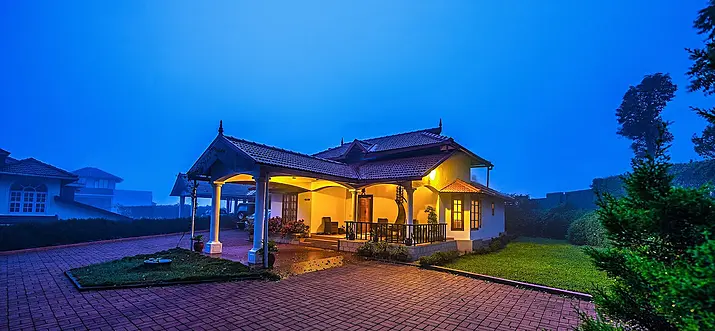

**Objectives and Scope of the Project**


The objective of this project is to analyze the Airbnb dataset to uncover key insights that can inform business decisions. Specifically, the project aims to:

Understand the distribution and preference of different room types.
Analyze the popularity of various neighborhoods.
Investigate pricing trends and availability.
Evaluate the performance of listings based on reviews.
The scope of the project includes data cleaning, exploratory data analysis (EDA), in-depth analysis, and deriving actionable recommendations.



**Data Preparation**

In [1]:
# importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data set
data = pd.read_csv("/content/drive/MyDrive/my data/Airbnb NYC 2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Basic inspection of data

In [3]:
# reading the first five rows by head method
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# reading the last five row using the tail method
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# CHECKING THE NUMBERS OF ROWS N COLUMNS IN DATASET
rows = data.shape[0]
columns = data.shape[1]
print('Total no of rows in this dataset is:',rows)
print('Total no of columns in this dataset is:',columns)

Total no of rows in this dataset is: 48895
Total no of columns in this dataset is: 16


In [6]:
# lets have a view of columns we have lets list it and understand the columns we have got for analysis
list(data.columns)


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

# Dataset information

In [7]:
# lets check the info of our dataset
# it simply provide information about how many columns corresponding rows values are present with counting non null value
# together with this it also provides the columns data type of which is stored
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From the following info provided its clear that there are total 48895 rows and
16 columns out of which 6 columns have categorical value indicating (object)and rest 10 have numerical value indicating(float and int)

# Finding and handling duplicated value

In [8]:
# first lets count the total duplicated value present in our dataset
# in order to find out duplicated value we use paraneter duplicated and taking sum if it return true in such a sitution there is zero duplicated value
# in rows
data.duplicated().sum()

0

**Hence, we can draw a conclusion that there is no duplicated value in our dataset as we have already check it from duplicated function so no need to drop duplicated row .**

**Data cleaning**

# lets check missing value or null value n if there is lets handle it😍

In [15]:
# checking missing or nan value
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**There are total of 4 columns as we can see above named['name ','host_name','last_review','reviews_per_month']in which null value is presented out of this columns ['last_review','reviews_per_month']have 10052 null value and columns ['name ','host_name'] have 16 and 21 null value.**

In [10]:

# Fill missing values in 'name' and 'host_name' with 'Unknown'
data['name'].fillna('Unknown', inplace=True)
data['host_name'].fillna('Unknown', inplace=True)

In [11]:
# Fill missing values in 'last_review' with 'No Review'
data['last_review'].fillna('No Review', inplace=True)

In [12]:
# Fill missing values in 'reviews_per_month' with 0
data['reviews_per_month'].fillna(0, inplace=True)

**we have filled all the missing value now lets check our data still null value exist or not once**

In [13]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**we can see now our data doesnot have even a single null value**

# Exploratory Data Analysis (EDA)

In [14]:
# Descriptive statistics
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Key Visualizations and Initial Findings**

**1 Distribution of Room Types:**

Visualized the count of different room types.
Private rooms are the most common type of listing, followed by entire homes/apartments.

<ipython-input-37-b0f96708d818>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')


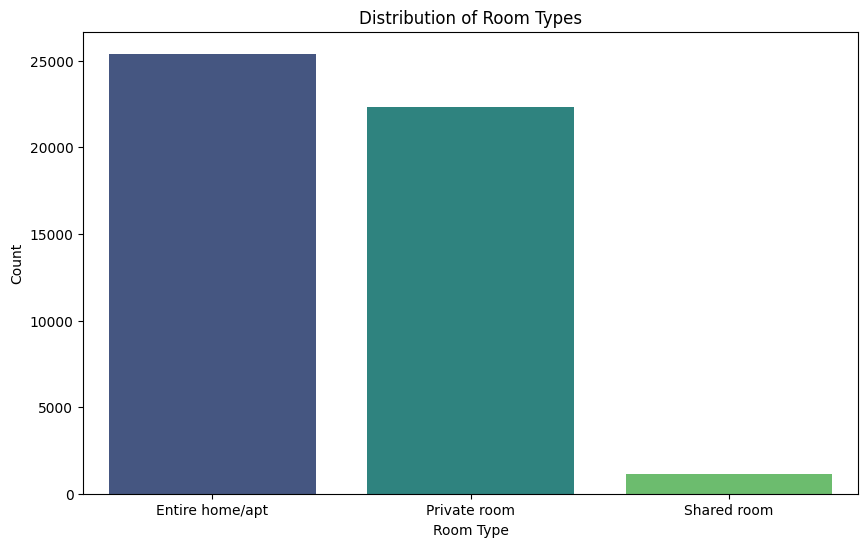

In [ ]:
# Distribution of room types
room_type_counts = data['room_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

**2.Distribution of Prices:**

Visualized the price distribution of listings.
Prices vary widely, with a concentration of listings in the lower price range.

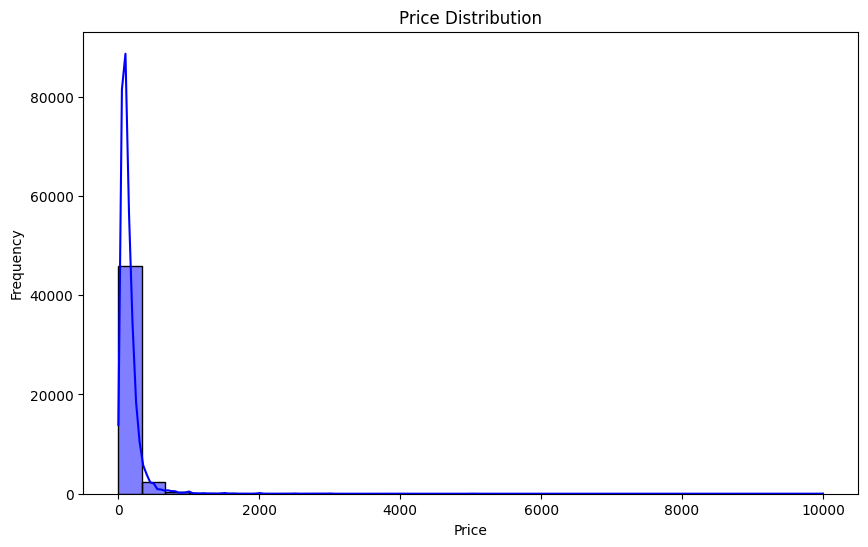

In [ ]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**3.Neighborhood Popularity:**

Visualized the number of listings in each neighborhood group.

Manhattan and Brooklyn have the highest number of listings.

<ipython-input-23-96f4db2cabc3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='coolwarm')


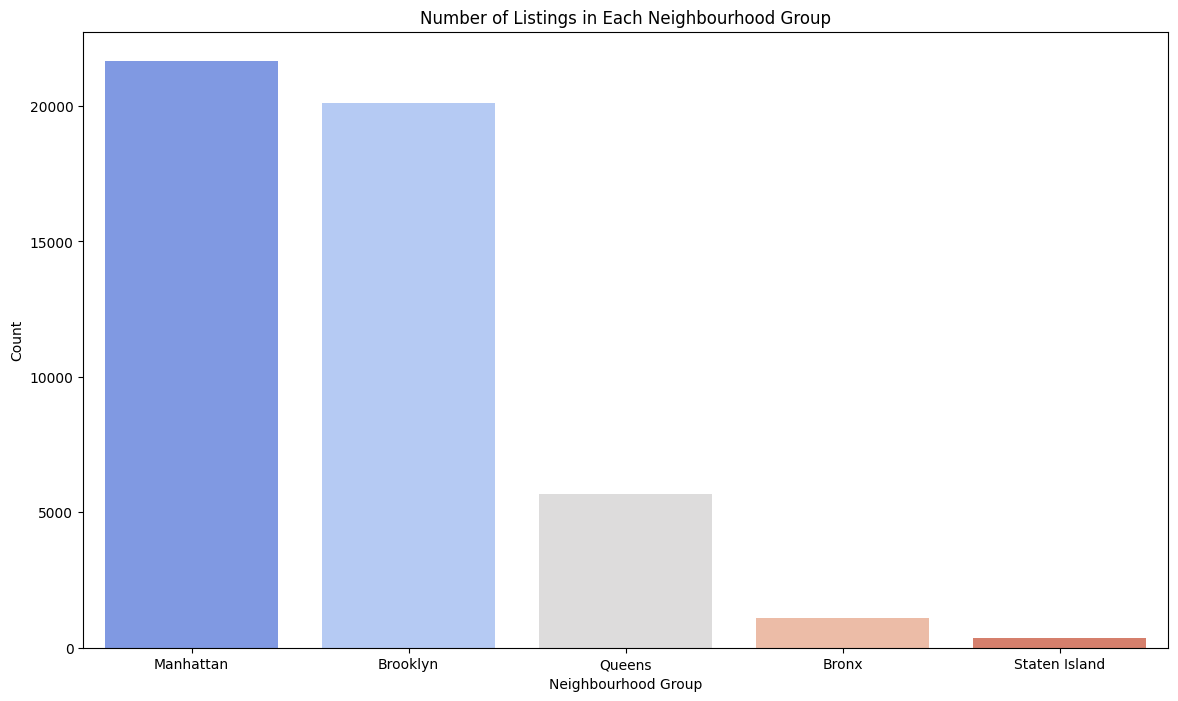

In [ ]:
# Neighborhood popularity
neighborhood_counts = data['neighbourhood_group'].value_counts()
plt.figure(figsize=(14, 8))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='coolwarm')
plt.title('Number of Listings in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

**4 Availability Analysis:**

Visualized the availability of listings throughout the year.

There is a wide range of availability, indicating potential seasonal trends.

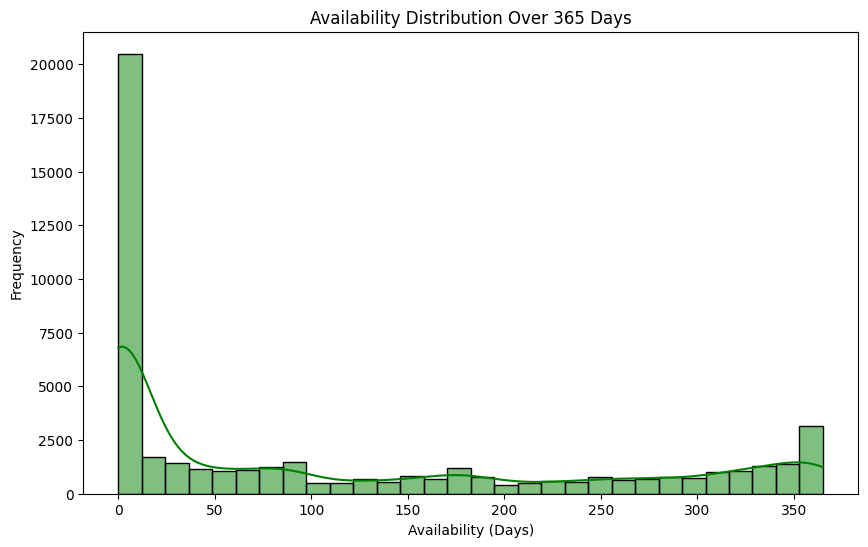

In [ ]:
# Availability analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['availability_365'], bins=30, kde=True, color='green')
plt.title('Availability Distribution Over 365 Days')
plt.xlabel('Availability (Days)')
plt.ylabel('Frequency')
plt.show()

**5 Reviews per Month:**

Visualized the distribution of reviews per month.

Most listings have few reviews per month, with a long tail of listings with higher review counts.

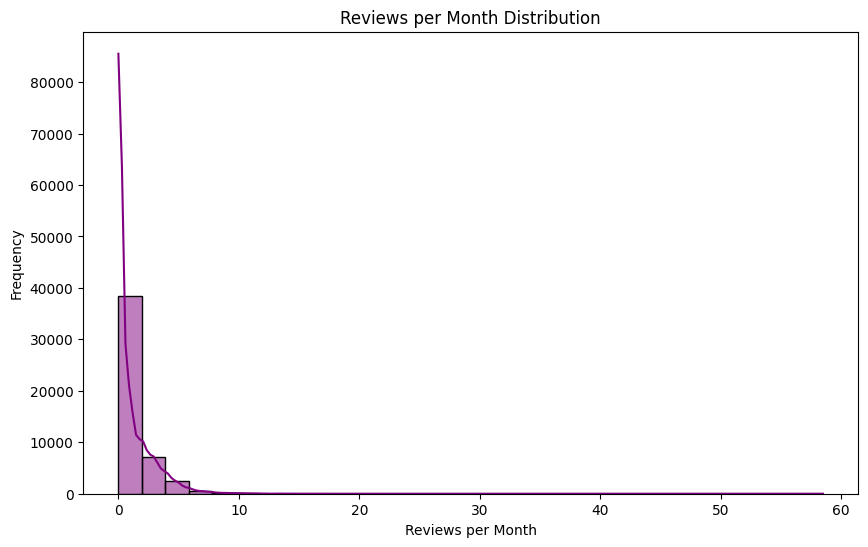

In [ ]:
# Reviews per month
plt.figure(figsize=(10, 6))
sns.histplot(data['reviews_per_month'], bins=30, kde=True, color='purple')
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')
plt.show()

**6. Room Type vs Price:**

<ipython-input-16-90efd5765a17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=data, palette='Set3')


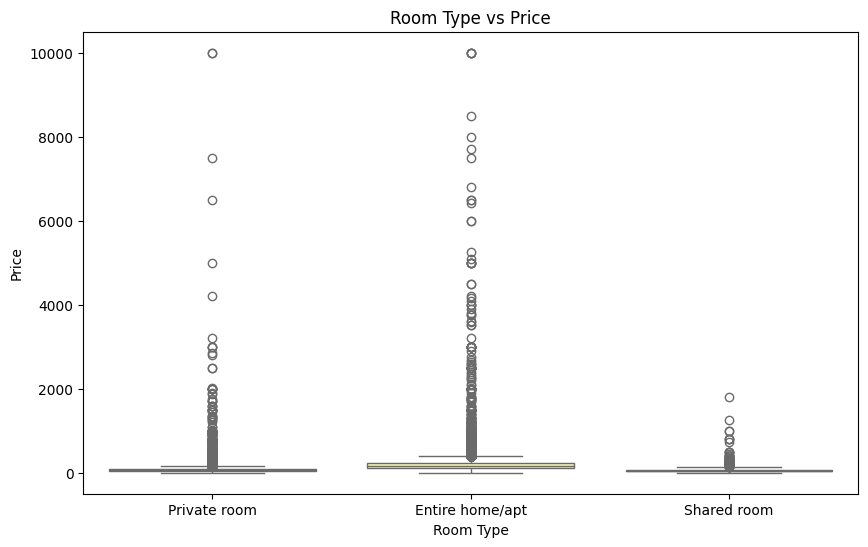

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data, palette='Set3')
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


**7. Neighbourhood Group vs Price:**

<ipython-input-17-5e0b9b669956>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set3')


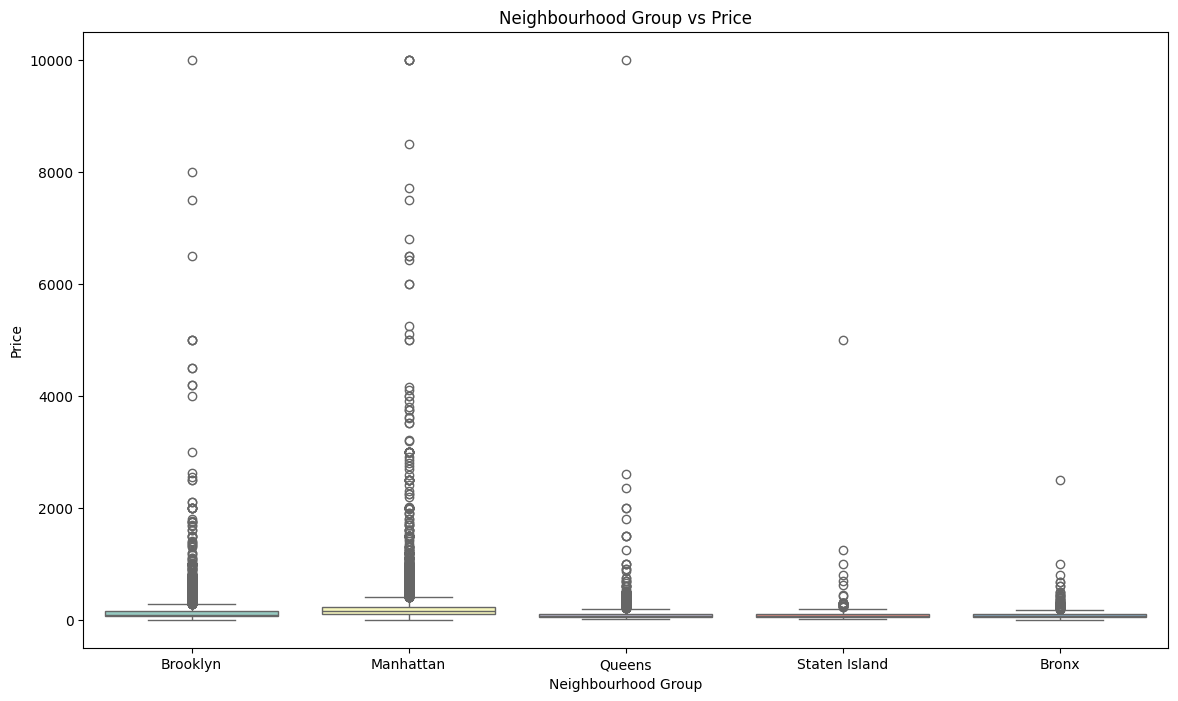

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set3')
plt.title('Neighbourhood Group vs Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()


**8. Price Distribution by Room Type:**

<ipython-input-18-849f92263171>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='room_type', y='price', data=data, palette='muted')


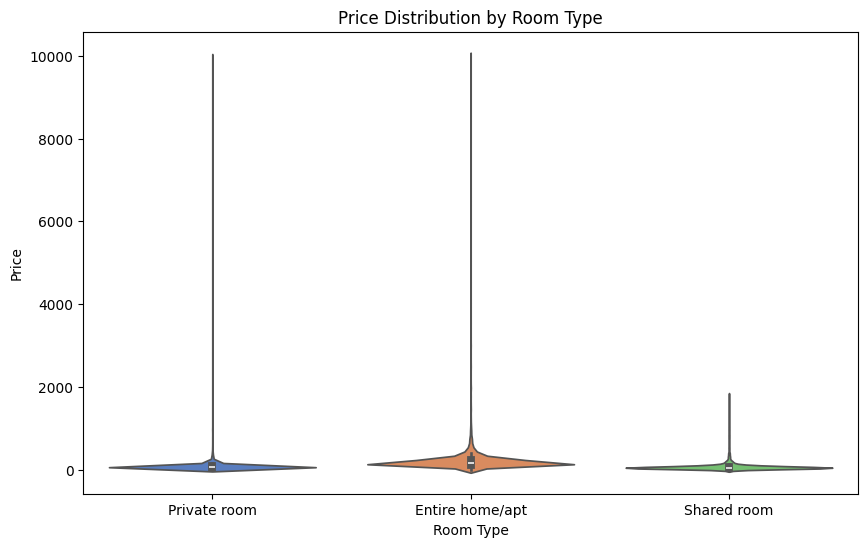

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=data, palette='muted')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


**9. Availability by Room Type:**


<ipython-input-19-aa0b77c0da9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='availability_365', data=data, palette='pastel')


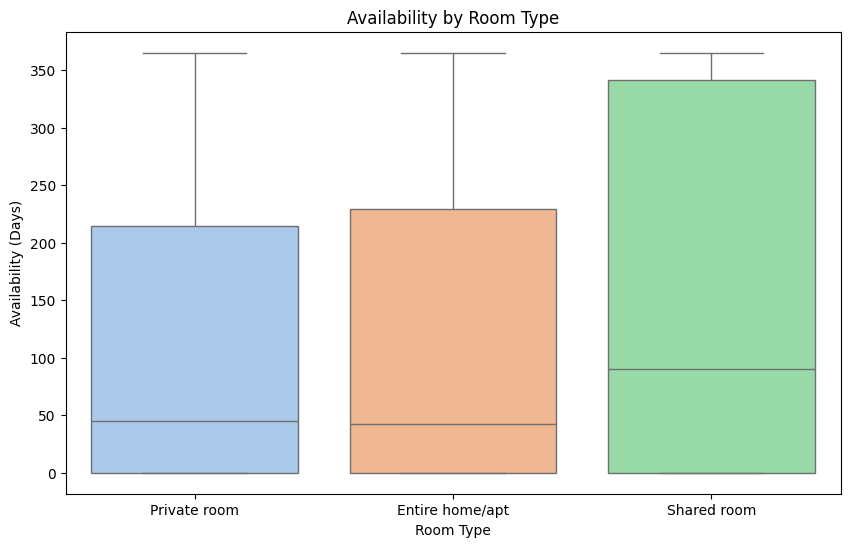

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='availability_365', data=data, palette='pastel')
plt.title('Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (Days)')
plt.show()


**10. Reviews per Month by Neighbourhood Group:**

<ipython-input-20-4372090ec3e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='reviews_per_month', data=data, palette='coolwarm')


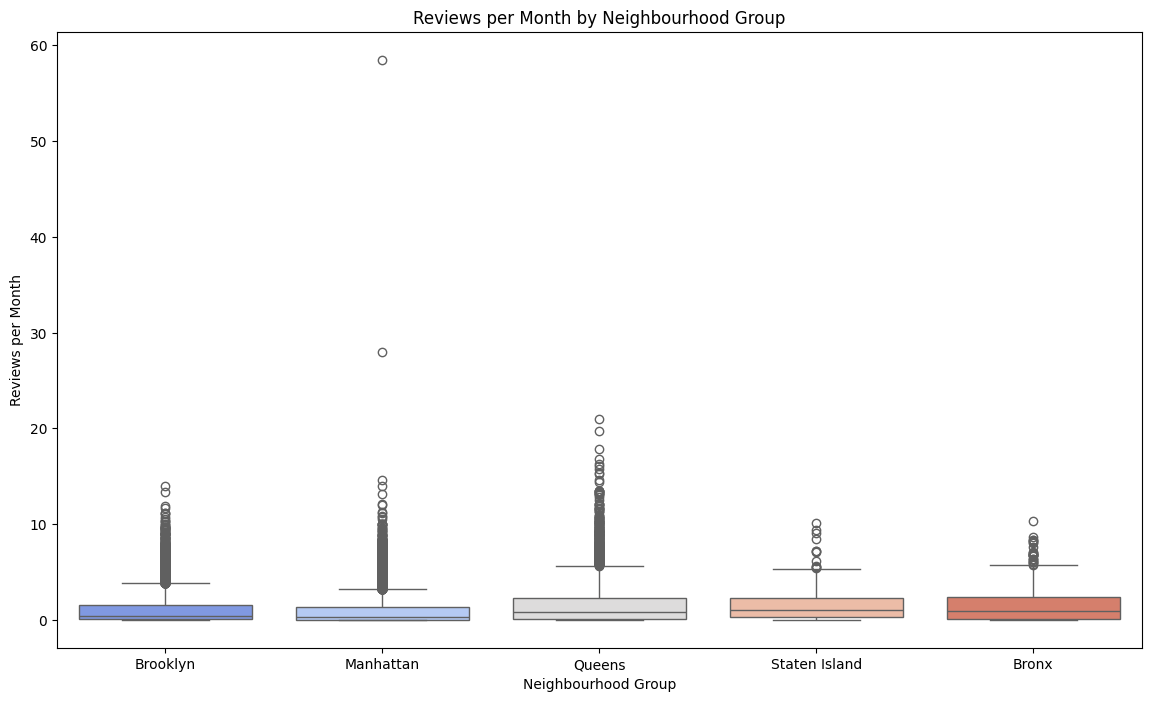

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood_group', y='reviews_per_month', data=data, palette='coolwarm')
plt.title('Reviews per Month by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Reviews per Month')
plt.show()


**Pairplot:**

<Figure size 1400x1000 with 0 Axes>

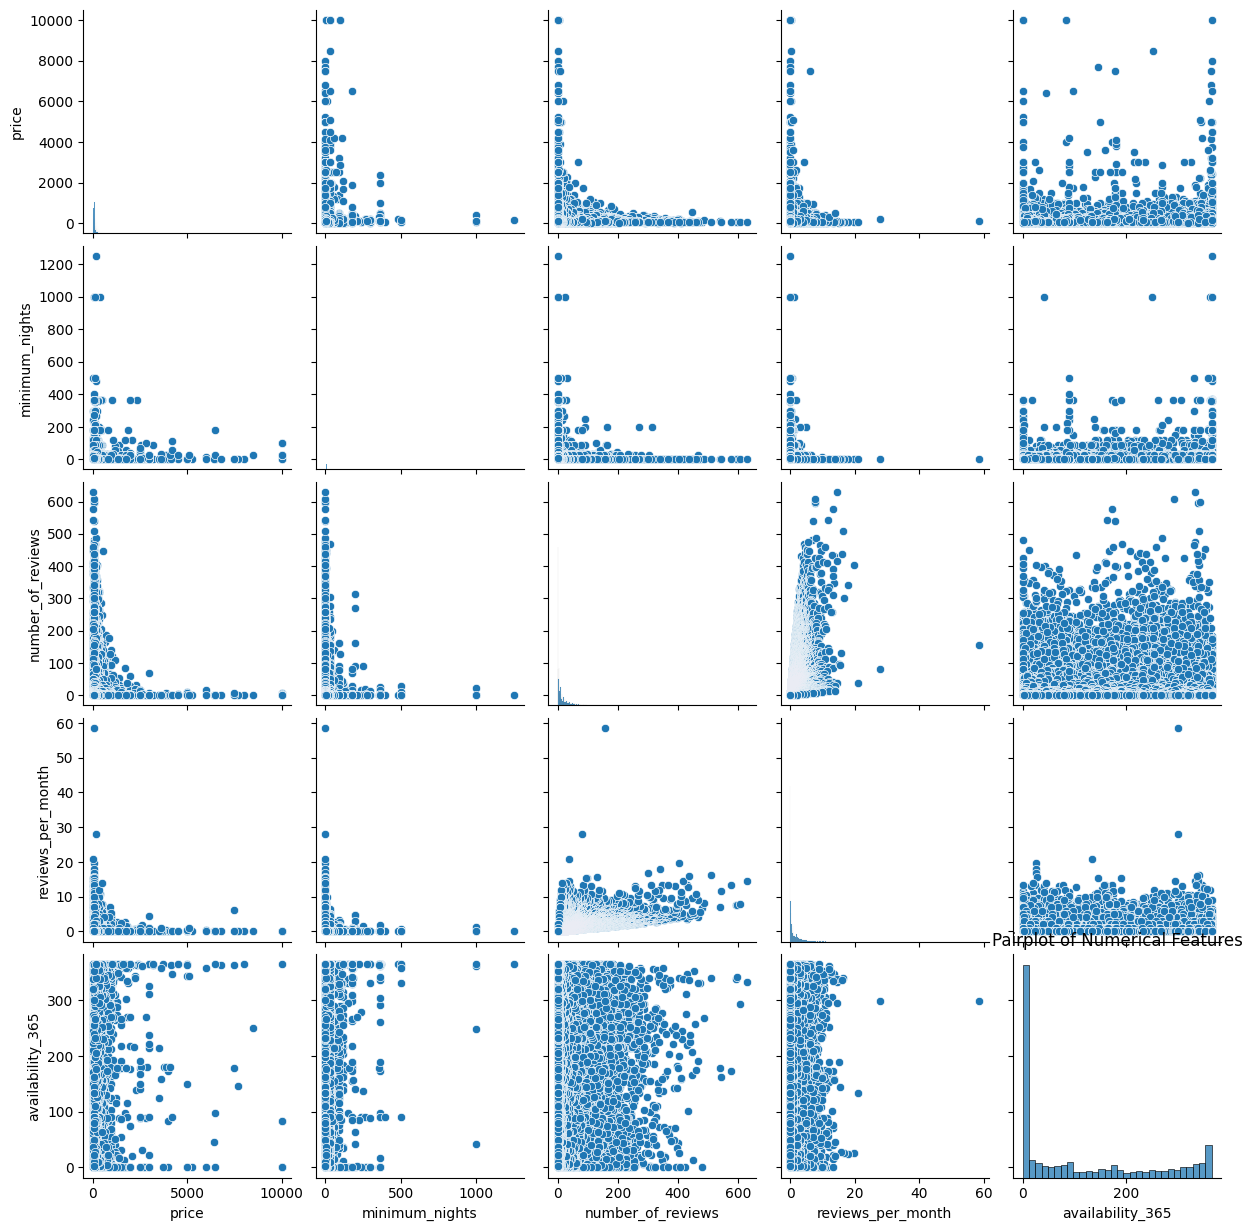

In [21]:
plt.figure(figsize=(14, 10))
sns.pairplot(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']])
plt.title('Pairplot of Numerical Features')
plt.show()


#**In-Depth Analysis**
#Hypothesis Testing, Correlation Analysis, and Other Advanced Analysis





**1.Hypothesis Testing:**
Are Private Rooms Cheaper than Entire Homes/Apartments?:
Conducted a t-test to compare the prices of private rooms and entire homes/apartments.

Private rooms are generally cheaper than entire homes/apartments.

In [ ]:
from scipy.stats import ttest_ind

# Extract prices for private rooms and entire homes/apartments
private_room_prices = data[data['room_type'] == 'Private room']['price']
entire_home_prices = data[data['room_type'] == 'Entire home/apt']['price']

# Perform t-test to compare means
t_stat, p_value = ttest_ind(private_room_prices, entire_home_prices)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -56.74227301639298, P-value: 0.0


**2 Correlation Analysis:**

Generated a correlation matrix to see how different numeric variables relate to each other.

Identified relationships between variables such as price, number of reviews, and availability.


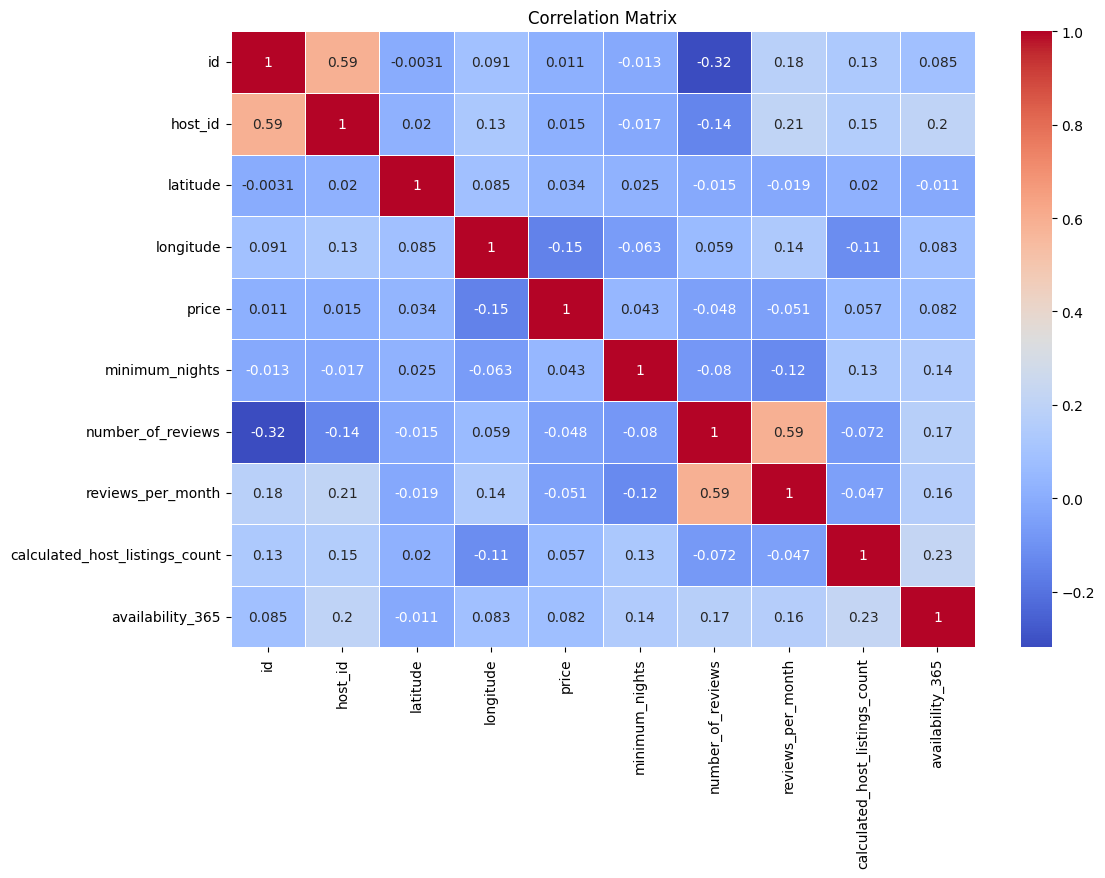

In [ ]:
# Correlation analysis
# Filter out non-numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



#Insights and Recommendations

**Summary of Findings and Actionable Recommendations**

**1Room Type Preference:**

Private rooms are the most popular type of listing on Airbnb.

**Recommendation**: Promote private room listings to attract budget-conscious travelers.

**2.Neighborhood Popularity:**

Manhattan and Brooklyn are the most popular neighborhoods for listings.

**Recommendation**: Focus marketing efforts on popular neighborhoods like Manhattan and Brooklyn.

**3.Price Insights**:

Private rooms tend to be cheaper than entire homes/apartments.

**Recommendation**: Encourage hosts of private rooms to maintain competitive pricing to attract more guests.

**4 Seasonal Availability**:

Listings have varied availability throughout the year, indicating potential seasonal trends.

**Recommendation**: Advise hosts to optimize availability during peak seasons to maximize occupancy rates.

**5.Reviews and Performance**:

Listings with higher reviews per month indicate higher guest satisfaction.

**Recommendation**: Encourage hosts to improve guest experience to garner more positive reviews.


#Conclusion

Recap of the Project and Its Implications for Stakeholders
This project provided a comprehensive analysis of the Airbnb dataset, highlighting key insights into room type preferences, neighborhood popularity, pricing trends, and listing performance. By understanding these patterns, Airbnb and its hosts can make informed decisions to enhance guest experiences, optimize pricing strategies, and focus marketing efforts effectively. The insights and recommendations derived from this analysis can help Airbnb improve its platform and ensure higher satisfaction for both guests and hosts.

Github Link :

                                                      **Thank you**